<a href="https://colab.research.google.com/github/aidsdarshana/Placement-Prediction--Codealpha/blob/main/PlacementPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CodeAlpha Internship:**

Name: DARSHANA P

Student ID: CD/03/45392

Task No: 2

Take Name: Building Model of Linear Regression

Batch: 1 october 2024

### **Import Libraries**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

### **Import Data**

In [22]:
# Import the Placement Data
dataset=pd.read_csv('/content/job_placement_data.csv')

In [23]:
dataset.head()

,education_level,experience,skills_score,placement_status
0,3,2,75,1
1,4,3,85,1
2,2,1,60,0
3,5,4,90,1
4,3,2,70,1


### **Data Preprocessing**

In [24]:
# Fill the Empty or Black Cell
dataset.fillna(dataset.mean(), inplace=True)

In [25]:
# sum of Null Value
dataset.isnull().sum()

,0
education_level,0
experience,0
skills_score,0
placement_status,0


### **Table Seperation**

In [26]:
X = dataset[['education_level', 'experience', 'skills_score']]
y = dataset['placement_status']

In [27]:
print(X)

   education_level  experience  skills_score
0                3           2            75
1                4           3            85
2                2           1            60
3                5           4            90
4                3           2            70
5                4           3            80
6                3           2            65
7                4           5            88
8                5           4            92
9                2           1            55


In [28]:
print(y)

0    1
1    1
2    0
3    1
4    1
5    1
6    0
7    1
8    1
9    0
Name: placement_status, dtype: int64


### **Model Building**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Create a linear regression model
model = LinearRegression()

In [31]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

### **Prediction**

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [33]:
# Convert predictions to binary values (0 or 1)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
print("Predicted Placement Status : ",y_pred_binary)

Predicted Placement Status :  [1, 1]


### **Model Evaluation**

In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
confusion = confusion_matrix(y_test, y_pred_binary)
report = classification_report(y_test, y_pred_binary)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', confusion)


Accuracy: 1.00
Confusion Matrix:
 [[2]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


### **Report**

In [40]:
# Report
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



### **Model Visualization**

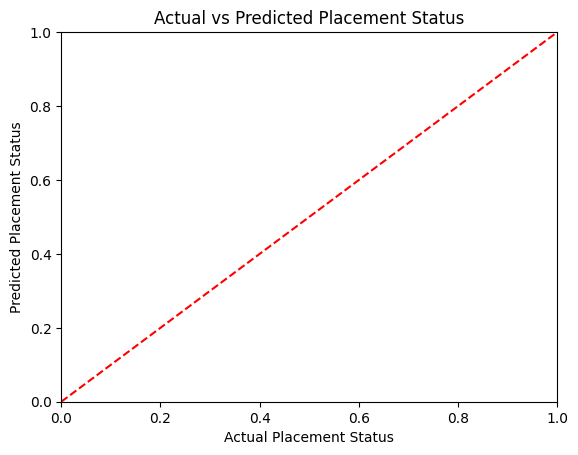

In [36]:
# Visualize the Result
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# Diagonal line for perfect predictions
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Actual Placement Status')
plt.ylabel('Predicted Placement Status')
plt.title('Actual vs Predicted Placement Status')
plt.show()

### **Chatbot**

In [39]:
a = int(input("Enter the Education Level (1-5): "))  # Assume 1 to 5 scale
b = int(input("Enter the Experience (in years): "))  # Assume years of experience
c = int(input("Enter the Skills Score (0-100): "))  # Assume score out of 100

# Make prediction based on user input
result = model.predict([[a, b, c]])
result_binary = 1 if result >= 0.5 else 0  # Convert prediction to binary

if result_binary == 0:
    print("Placement rejected")
else:
    print("Placement granted")

Enter the Education Level (1-5): 1
Enter the Experience (in years): 0
Enter the Skills Score (0-100): 55
Placement rejected


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
